In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from PIL import Image
import numpy as np
import random

In [3]:
data = pd.read_excel('../../Data/Predictions/Logistic Regression/Logistic_Regression_Classifier_Predictions_All_Features_PCA.xlsx')
print(data)

            Class                           harmonized_filename  \
0          Pickup       Pickup_test_orig_test_05620_resized.jpg   
1             SUV          SUV_test_orig_test_08041_resized.jpg   
2     Convertible  Convertible_test_orig_test_00822_resized.jpg   
3     Convertible  Convertible_test_orig_test_00618_resized.jpg   
4          Pickup       Pickup_test_orig_test_05241_resized.jpg   
...           ...                                           ...   
1484          SUV          SUV_test_orig_test_07199_resized.jpg   
1485  Convertible  Convertible_test_orig_test_06645_resized.jpg   
1486        Sedan       Sedan_test_orig_train_00676_resized.jpg   
1487        Sedan       Sedan_test_orig_train_04786_resized.jpg   
1488          SUV         SUV_test_orig_train_03571_resized.jpg   

                                        image_path_blur  \
0     ../../../Images/test/Blurred/Pickup_test_orig_...   
1     ../../../Images/test/Blurred/SUV_test_orig_tes...   
2     ../../../Ima

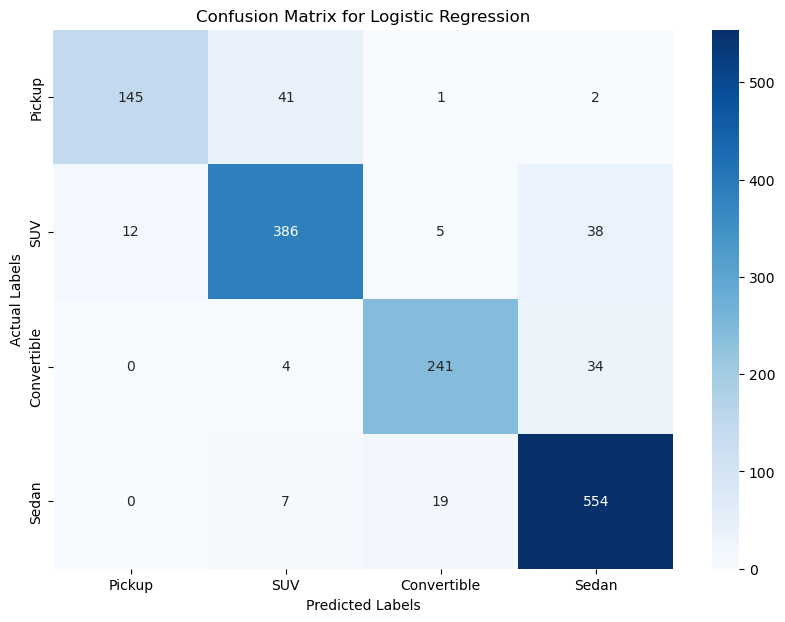

In [4]:
actual_labels = data['Class']
predicted_column = f'Logistic_Regression_Classification'
predicted_labels = data[predicted_column]

cm = confusion_matrix(actual_labels, predicted_labels, labels=actual_labels.unique())

#Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=actual_labels.unique(), yticklabels=actual_labels.unique())
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title(f'Confusion Matrix for Logistic Regression')
plt.show()

## Generic Function to viz Confusion Matrix

In [ ]:
# base_path = '../../Data/Predictions/'

In [ ]:
# classifier_name = 'Logistic Regression'

In [ ]:
# def visualize_classifier_confusion_matrix(base_path, classifier_name):
#     classifier_dir = os.path.join(base_path, classifier_name)
    
#     file_pattern = os.path.join(classifier_dir, f'{classifier_name.replace(" ", "_")}*.xlsx')
#     files = glob.glob(file_pattern)

#     if not files:
#         print(f"No Excel files found for classifier '{classifier_name}' in '{classifier_dir}'.")
#         return
    
#     file_path = files[0]

#     data = pd.read_excel(file_path)

#     actual_labels = data['Class']
#     predicted_column = [col for col in data.columns if 'Classification' in col][0] 
#     predicted_labels = data[predicted_column]

#     # Compute the confusion matrix
#     cm = confusion_matrix(actual_labels, predicted_labels, labels=actual_labels.unique())

#     # Visualize the confusion matrix
#     plt.figure(figsize=(10, 7))
#     sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=actual_labels.unique(), yticklabels=actual_labels.unique())
#     plt.xlabel('Predicted Labels')
#     plt.ylabel('Actual Labels')
#     plt.title(f'Confusion Matrix for {classifier_name}')
#     plt.show()

In [ ]:
# visualize_classifier_confusion_matrix('path/to/Predictions', 'Logistic Regression')
# visualize_classifier_confusion_matrix('path/to/Predictions', 'XGBoost')

In [ ]:
# visualize_classifier_confusion_matrix(base_path, classifier_name)

## Classification Report

In [9]:
def analyze_classifier_performance(base_path, classifier_name):
    
    classifier_colors = {
        'Logistic Regression': 'Blues',
        'XGBoost': 'Reds',
        'SVM': 'Greens'
    }
    
    classifier_dir = os.path.join(base_path, classifier_name)
    file_pattern = os.path.join(classifier_dir, f'{classifier_name.replace(" ", "_")}*.xlsx')
    files = glob.glob(file_pattern)

    if not files:
        print(f"No Excel files found for classifier '{classifier_name}' in '{classifier_dir}'.")
        return
    
    for file_path in files:
        base_file_name = os.path.basename(file_path).rsplit('.', 1)[0]
        data = pd.read_excel(file_path)
        actual_labels = data['Class']
        predicted_column = [col for col in data.columns if 'Classification' in col][0]
        predicted_labels = data[predicted_column]

        #Classification Report
        report = classification_report(actual_labels, predicted_labels, output_dict=True)
        report_file_name = f'{base_file_name}_Classification_Report.xlsx'
        pd.DataFrame(report).transpose().to_excel(report_file_name)

         # Confusion Matrix
        cm_color = classifier_colors.get(classifier_name, 'Blues')
        cm = confusion_matrix(actual_labels, predicted_labels, labels=np.unique(actual_labels))
        plt.figure(figsize=(10, 7))
        sns.heatmap(cm, annot=True, fmt="d", cmap=cm_color, xticklabels=actual_labels.unique(), yticklabels=actual_labels.unique())
        plt.xlabel('Predicted Labels')
        plt.ylabel('Actual Labels')
        plt.title(f'Confusion Matrix for {base_file_name}')
        cm_image_name = f'{base_file_name}_Confusion_Matrix.png'
        plt.savefig(cm_image_name)
        plt.close()
        
        print(f"Processed {file_path}:")
        print(f" - Classification report saved as {report_file_name}")
        print(f" - Confusion matrix image saved as {cm_image_name}")



#     # Misclassified Images
#     misclassified_indices = np.where(actual_labels != predicted_labels)[0]
#     selected_indices = random.sample(list(misclassified_indices), min(5, len(misclassified_indices)))
#     if selected_indices:
#         plt.figure(figsize=(20, 4))
#         for i, index in enumerate(selected_indices, 1):
#             excel_image_path = data.iloc[index]['image_path_no_blur'].strip()
#             adjusted_image_path = excel_image_path.lstrip('.').lstrip('/').split('/', 3)[-1]
#             full_image_path = os.path.join(images_root_dir, adjusted_image_path)
#             image = Image.open(full_image_path)
#             plt.subplot(1, 5, i)
#             plt.imshow(image)
#             plt.title(f'{actual_labels[index]} Misclassified As {predicted_labels[index]}')
#             plt.axis('off')
#         plt.savefig(f'{classifier_name}_Misclassified_Images.png')
#         plt.close()

In [10]:
analyze_classifier_performance('../../Data/Predictions/', 'Logistic Regression')

Processed ../../Data/Predictions/Logistic Regression/Logistic_Regression_Classifier_Predictions_Individual_Features_PCA.xlsx:
 - Classification report saved as Logistic_Regression_Classifier_Predictions_Individual_Features_PCA_Classification_Report.xlsx
 - Confusion matrix image saved as Logistic_Regression_Classifier_Predictions_Individual_Features_PCA_Confusion_Matrix.png
Processed ../../Data/Predictions/Logistic Regression/Logistic_Regression_Classifier_Predictions_All_Features_PCA.xlsx:
 - Classification report saved as Logistic_Regression_Classifier_Predictions_All_Features_PCA_Classification_Report.xlsx
 - Confusion matrix image saved as Logistic_Regression_Classifier_Predictions_All_Features_PCA_Confusion_Matrix.png


In [11]:
analyze_classifier_performance('../../Data/Predictions/', 'SVM')

Processed ../../Data/Predictions/SVM/SVM_Classifier_Predictions_Individual_Features_PCA.xlsx:
 - Classification report saved as SVM_Classifier_Predictions_Individual_Features_PCA_Classification_Report.xlsx
 - Confusion matrix image saved as SVM_Classifier_Predictions_Individual_Features_PCA_Confusion_Matrix.png
Processed ../../Data/Predictions/SVM/SVM_Classifier_Predictions_All_Features_PCA.xlsx:
 - Classification report saved as SVM_Classifier_Predictions_All_Features_PCA_Classification_Report.xlsx
 - Confusion matrix image saved as SVM_Classifier_Predictions_All_Features_PCA_Confusion_Matrix.png


In [ ]:
#run this to get the Confusion matrix and classfication report files

# analyze_classifier_performance('../../Data/Predictions/', 'XGBoost')